In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Purchased']),df['Purchased'],test_size=.3,random_state=0)
                                               

In [18]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

# standard scaler

In [20]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [26]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [28]:
x_train_scaled


,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [33]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [34]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


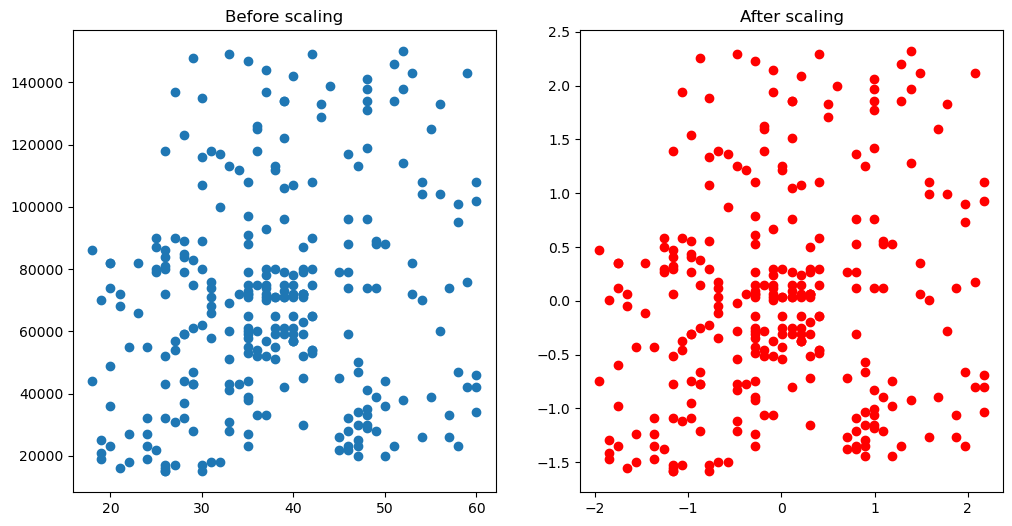

In [41]:
fig,(p1,p2)=plt.subplots(ncols=2,figsize=(12,6))
p1.scatter(x_train['Age'],x_train['EstimatedSalary'])
p1.set_title("Before scaling")
p2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],c='r')
p2.set_title('After scaling')
plt.show()

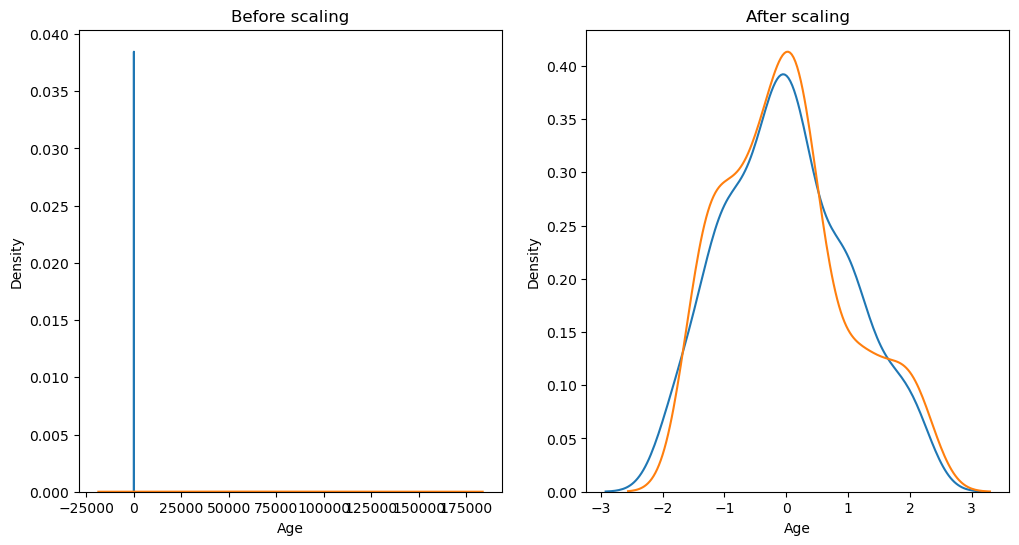

In [44]:
import seaborn as sns
fig,(p1,p2)=plt.subplots(ncols=2,figsize=(12,6))
sns.kdeplot(x_train['Age'],ax=p1)
sns.kdeplot(x_train['EstimatedSalary'],ax=p1)
p1.set_title("Before scaling")


sns.kdeplot(x_train_scaled['Age'],ax=p2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=p2)
p2.set_title('After scaling')
plt.show()

# Why scaling is important ii building a machine learning model

In [45]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()


lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)


y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)

0.6583333333333333

In [54]:
accuracy_score(y_test,y_pred_scaled)

0.8666666666666667

# Effect of outlier in the data set

In [55]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [59]:
df=df.append(pd.DataFrame({'Age':[6,80,90],'EstimatedSalary':[10000,2300000,500000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_79380\2944557052.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame({'Age':[6,80,90],'EstimatedSalary':[10000,2300000,500000],'Purchased':[0,1,1]}),ignore_index=True)


In [60]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,80,2300000,1
402,90,500000,1
403,6,10000,0
404,80,2300000,1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

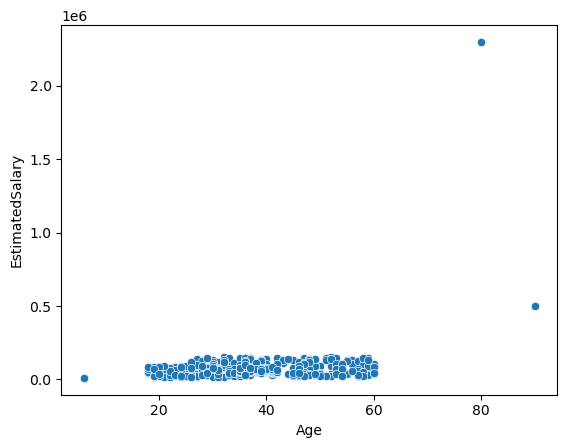

In [62]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'])

# Note :After standardization the effect of the outlier does not go

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

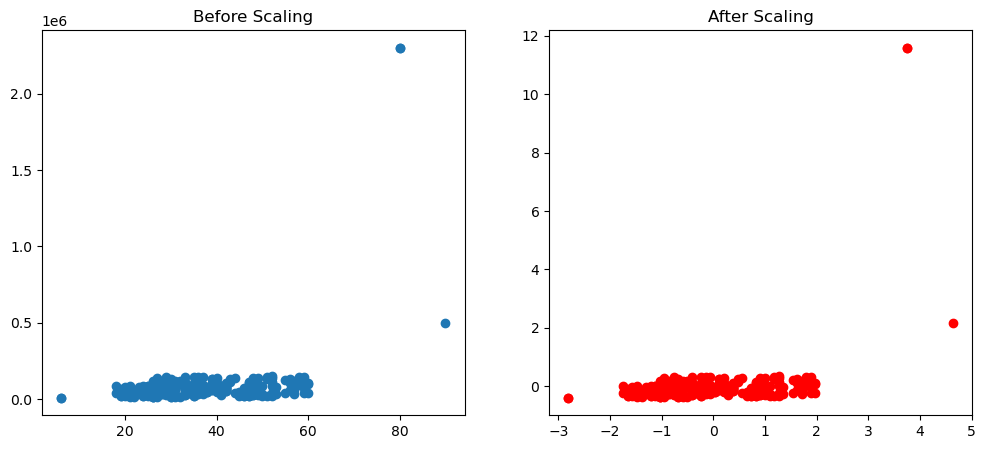

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()